# Import necessary libraries and modules for image processing and visualization.

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np


# Define the path to the training dataset and list the emotion categories.

In [5]:
train_data_dir = 'Face Detection/train'

emotion_categories = os.listdir(train_data_dir)
print("Emotion Categories Found:")
print(emotion_categories)


Emotion Categories Found:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


# Count the number of images in each category and print the counts.

In [6]:
emotion_counts = []

print("Counting images in each category:")
for category in emotion_categories:
    category_path = os.path.join(train_data_dir, category)
    count = len(os.listdir(category_path))
    print(f"Category '{category}' has {count} images.")
    emotion_counts.append(count)

Counting images in each category:
Category 'angry' has 3995 images.
Category 'disgust' has 436 images.
Category 'fear' has 4097 images.
Category 'happy' has 7215 images.
Category 'neutral' has 4965 images.
Category 'sad' has 4830 images.
Category 'surprise' has 3171 images.


# Visualize the distribution of images across categories using a bar chart.

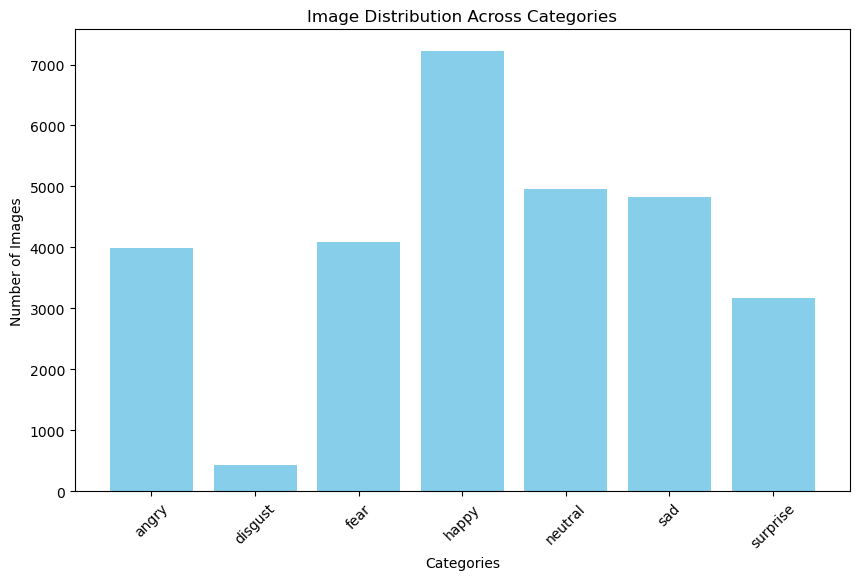

In [7]:

plt.figure(figsize=(10, 6))
plt.bar(emotion_categories, emotion_counts, color='skyblue')
plt.title('Image Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


# Plot 10 sample images for each emotion category from the training dataset.

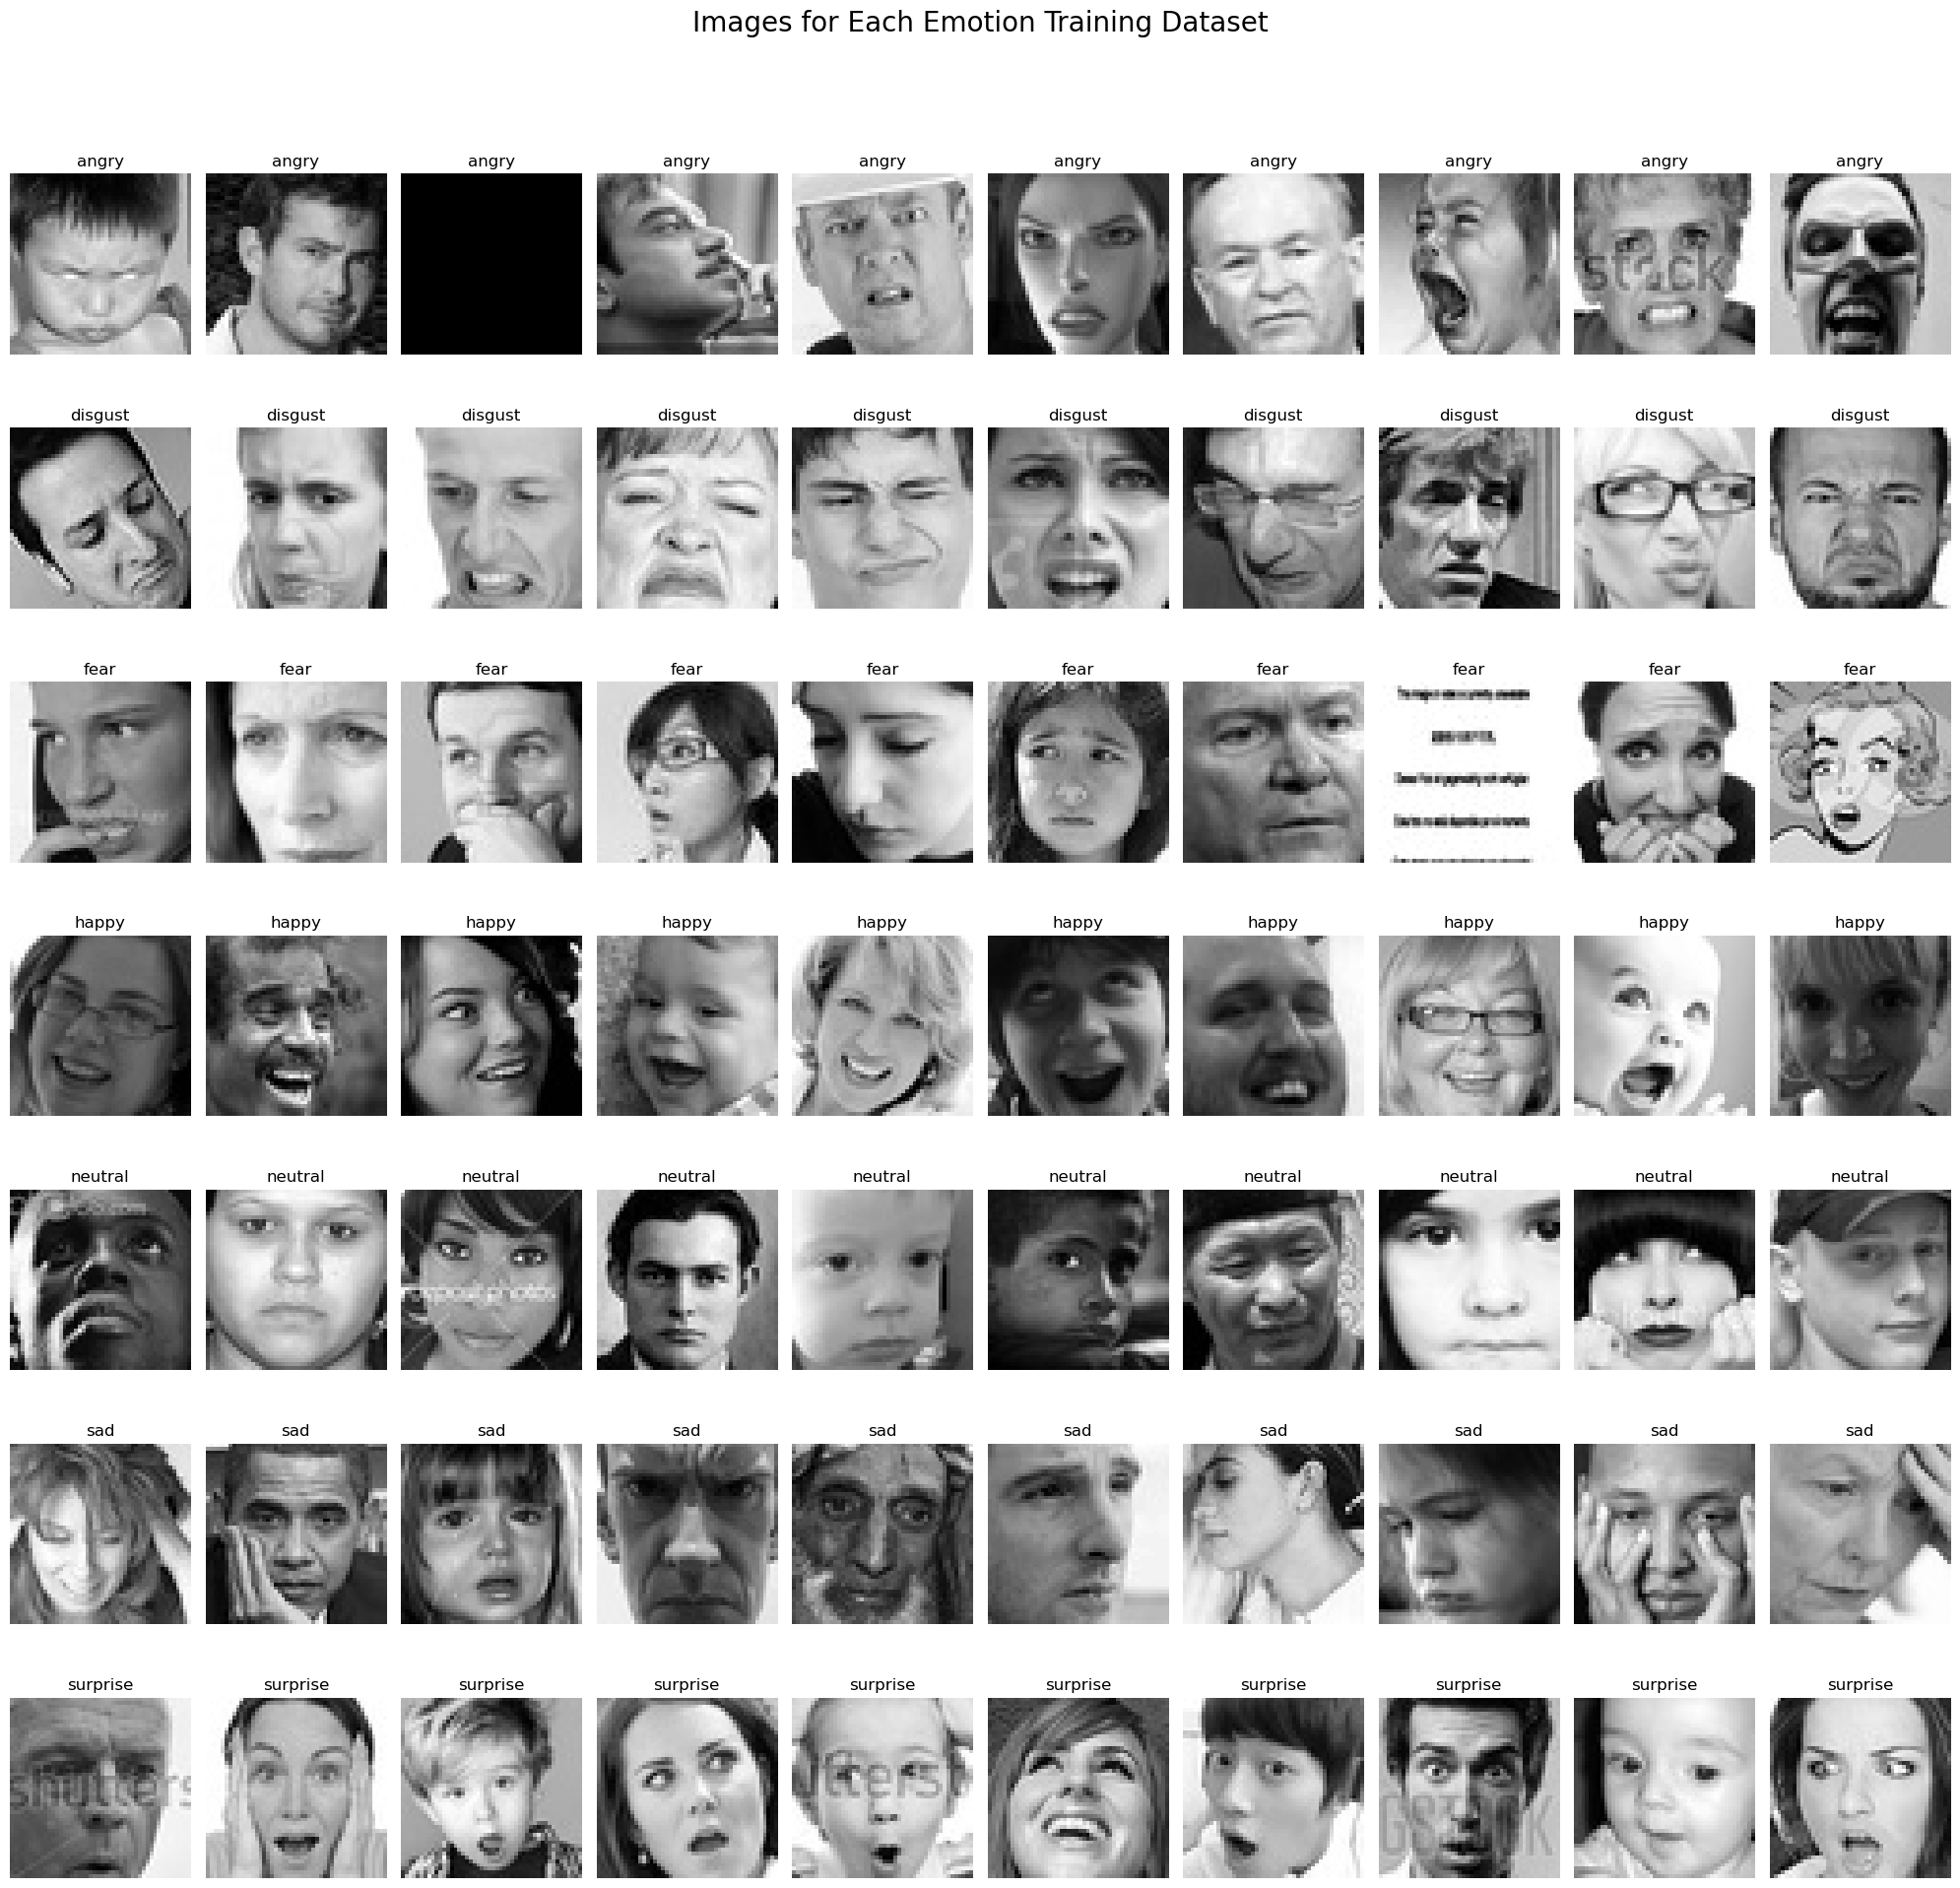

In [8]:
def plot_sample_images_10(data_dir, emotion_categories, img_width, img_height, caption="Training Dataset"):
    plt.figure(figsize=(20, 20))  

    for i, category in enumerate(emotion_categories):

        category_path = os.path.join(data_dir, category)
        images = os.listdir(category_path)
        
        for j in range(10):
            img_path = os.path.join(category_path, images[j])
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_width, img_height))

            plt.subplot(len(emotion_categories), 10, i * 10 + j + 1)
            plt.imshow(img, cmap='gray')
            plt.title(category)
            plt.axis('off')


    plt.suptitle(f'Images for Each Emotion {caption}', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  
    plt.show()

emotion_categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  

plot_sample_images_10(train_data_dir, emotion_categories, img_width=48, img_height=48)

# Define a class named Preprocessing that containing various image preprocessing methods with the apply_all method that Apply all preprocessing steps in sequence on an image given it's path in the parameter.

The list of preprocessing methods in the Preprocessing class:

-rescale_image: Normalize pixel values to the range [0, 1].

-resize_image: Resize the image to a specified target size.

-rotate_image: Randomly rotate the image by a specified angle.

-shift_image: Randomly shift the image horizontally and vertically.

-shear_image: Apply a shearing transformation to the image.

-zoom_image: Zoom into the image by a specified factor.

-flip_image: Flip the image horizontally.

-random_crop: Randomly crop a region of the image.

-random_erasing: Randomly erase a rectangular region of the image with white color.

-noise_reduction: Apply Gaussian blur for noise reduction.

In [9]:
class Preprocessing:


    def rescale_image(self, image):

        return image / 255.0
    

    def resize_image(self, image, target_size=(48, 48)):

        return cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    

    def rotate_image(self, image, angle=30):

        h, w = image.shape[:2]
        center = (w // 2, h // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        return cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)


    def shift_image(self, image, width_shift=0.2, height_shift=0.2):

        h, w = image.shape[:2]
        tx = width_shift * w
        ty = height_shift * h
        translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
        return cv2.warpAffine(image, translation_matrix, (w, h), borderMode=cv2.BORDER_REFLECT)


    def shear_image(self, image, shear_factor=0.2):

        h, w = image.shape[:2]
        shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
        return cv2.warpAffine(image, shear_matrix, (w + int(shear_factor * h), h), borderMode=cv2.BORDER_REFLECT)


    def zoom_image(self, image, zoom_factor=0.2):

        h, w = image.shape[:2]
        zoom_h = int(h * (1 - zoom_factor))
        zoom_w = int(w * (1 - zoom_factor))
        start_y = (h - zoom_h) // 2
        start_x = (w - zoom_w) // 2
        cropped = image[start_y:start_y + zoom_h, start_x:start_x + zoom_w]
        zoomed = np.zeros((h, w))
        for i in range(h):
            for j in range(w):
                src_x = int(j * zoom_w / w)
                src_y = int(i * zoom_h / h)
                zoomed[i, j] = cropped[src_y, src_x]
        return zoomed
    

    def flip_image(self, image):

        h, w = image.shape[:2]
        flipped = np.zeros_like(image)
        for y in range(h):
            for x in range(w):
                flipped[y, w - x - 1] = image[y, x]
        return flipped
    

    def random_crop(self, image, crop_size=0.8):

        h, w = image.shape[:2]
        crop_h, crop_w = int(h * crop_size), int(w * crop_size)
        start_y = np.random.randint(0, h - crop_h)
        start_x = np.random.randint(0, w - crop_w)
        cropped = image[start_y:start_y + crop_h, start_x:start_x + crop_w]
        resized = np.zeros((h, w))
        for i in range(h):
            for j in range(w):
                src_x = int(j * crop_w / w)
                src_y = int(i * crop_h / h)
                resized[i, j] = cropped[src_y, src_x]
        return resized
    

    def random_erasing(self, image, erase_size=0.2):

        h, w = image.shape[:2]
        erase_h, erase_w = int(h * erase_size), int(w * erase_size)
        start_y = np.random.randint(0, h - erase_h)
        start_x = np.random.randint(0, w - erase_w)
        erased = image.copy()
        erased[start_y:start_y + erase_h, start_x:start_x + erase_w] = 255  
        return erased
    

    def noise_reduction(self, image):

        return cv2.GaussianBlur(image, (5, 5), 0)
    

    def apply_all(self, image):

        results = {
            'Original': image,
            'Resized': self.resize_image(image),
            'Rescaled': self.rescale_image(image),
            'Noise Reduced': self.noise_reduction(image),
            'Rotated': self.rotate_image(image, angle=30),
            'Shifted': self.shift_image(image, width_shift=0.2, height_shift=0.2),
            'Sheared': self.shear_image(image, shear_factor=0.2),
            'Zoomed': self.zoom_image(image, zoom_factor=0.2),
            'Flipped': self.flip_image(image),
            'Random Crop': self.random_crop(image, crop_size=0.8),
            'Random Erasing': self.random_erasing(image, erase_size=0.2)
        }
        return results


# Visualize the results of all preprocessing steps for a sample image.

# Example usage:

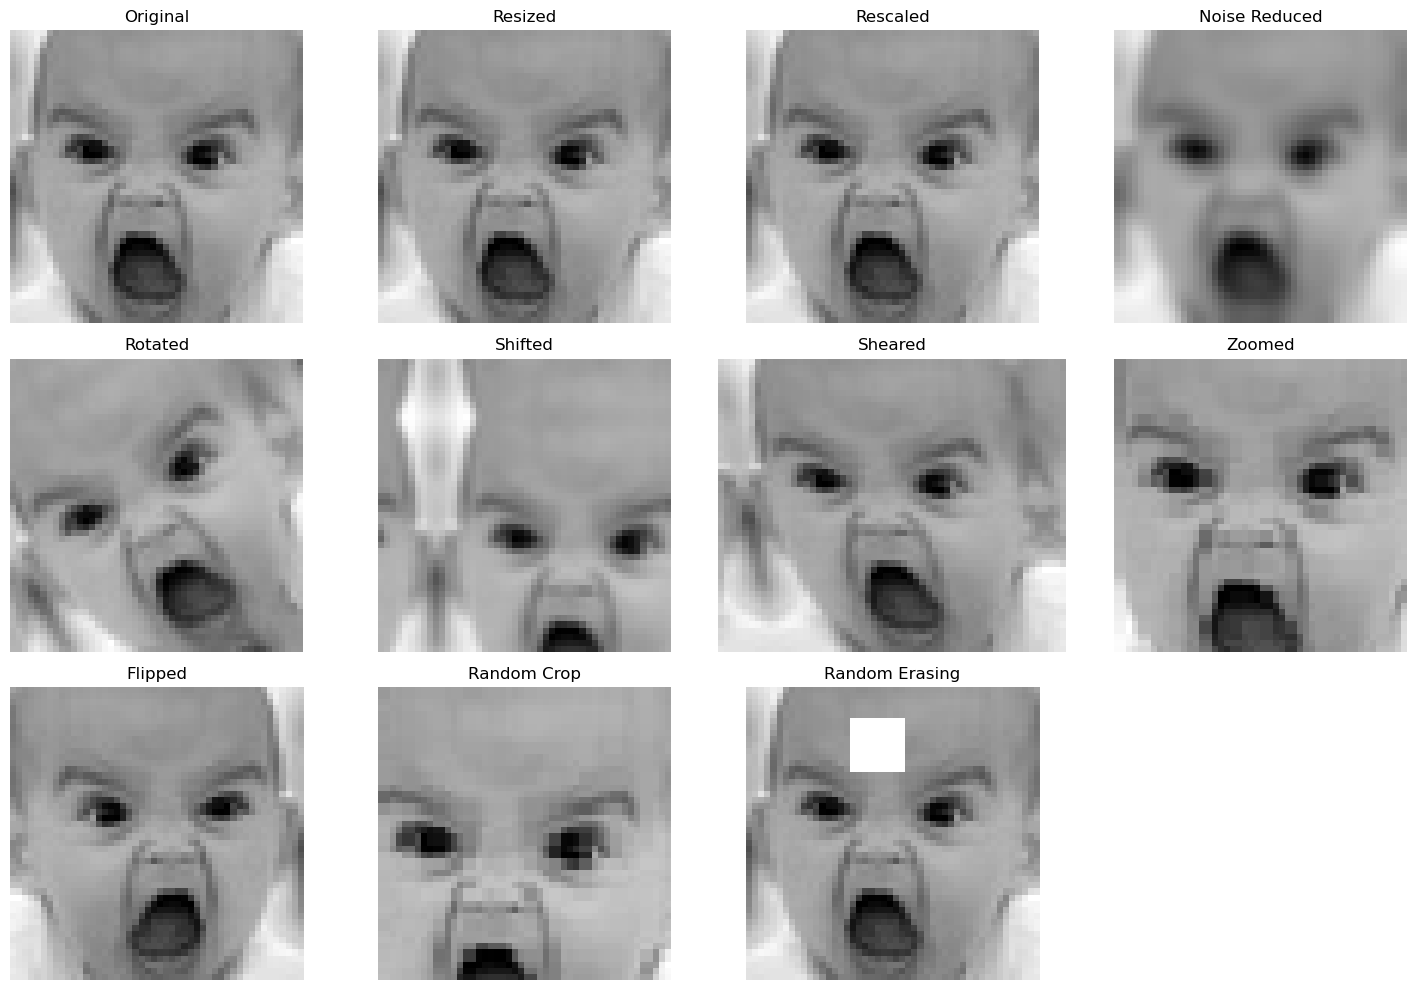

In [12]:
def visualize_preprocessed_images(results):
    """Visualize the results of all preprocessing steps."""
    plt.figure(figsize=(15, 10))
    for i, (title, image) in enumerate(results.items()):
        plt.subplot(3, 4, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    preprocessor = Preprocessing()
    

    image_path = 'Face Detection/train/angry/Training_233976.jpg' 
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    results = preprocessor.apply_all(image)
    
    visualize_preprocessed_images(results)

# Feature Extraction using Histogram of Oriented Gradients (HOG)

# HOG technique extract features from the images focusing on the parts that are most likely to distinguish one emotion from another. 

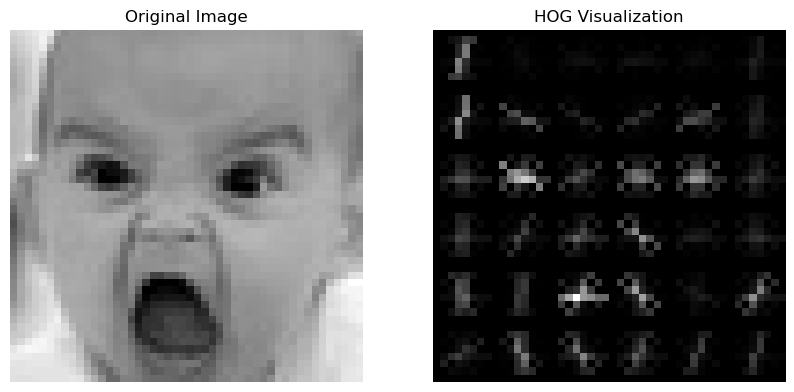

In [13]:
from skimage.feature import hog

def extract_hog_features(image):

    features, hog_image = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True
    )
    return features, hog_image

image_path = 'Face Detection/train/angry/Training_233976.jpg' 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
features, hog_visualization = extract_hog_features(image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_visualization, cmap='gray')
plt.title("HOG Visualization")
plt.axis('off')
plt.show()

# Prepare the dataset by extracting HOG features for all images in the dataset.

In [14]:
def prepare_dataset(data_dir, emotion_categories):

    X = []  # Features
    y = []  # Labels
    for label, category in enumerate(emotion_categories):
        category_path = os.path.join(data_dir, category)
        images = os.listdir(category_path)
        
        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48)) 
            
            features, _ = extract_hog_features(img)
            X.append(features)
            y.append(label)
    return np.array(X), np.array(y)

# Prepare the dataset
X, y = prepare_dataset(train_data_dir, emotion_categories)
print(f"Dataset prepared: {X.shape[0]} samples with {X.shape[1]} features.")

Dataset prepared: 28709 samples with 900 features.
